In [2]:
import requests
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from html_table_parser import HTMLTableParser
import seaborn as sns
import re
import urllib.request
from pprint import pprint
from bs4 import BeautifulSoup
import time
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [3]:
url="https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&index=9"

In [4]:
page=requests.get(url)

In [5]:
page.status_code

200

In [6]:
pagecontent=page.text

In [7]:
pagecontent

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<title>Index Composition Nse, Stock/Share Indices, Sensex Indices, Composition Index, Stocks Gain / Lost</title>\r\n<meta name="description" content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, Stocks Gain / Lost - Moneycontrol.com">\r\n<meta name="keywords" content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, lost stocks,capital gain tax on stocks,highest gain stocks,top gain stocks,biggest gain stocks,stocks gain,stocks lost" />\r\n<script language="javascript" src="https://stat.moneycontrol.co.in/mcjs/markets/https_markets.js" type="text/javascript"></script>\r\n<script language="javascript">\r\nfunction postform(calltype)\r\n{\r\n\tdocument.myform.call_option.

In [8]:
soup=BeautifulSoup(pagecontent)

In [51]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Index Composition Nse, Stock/Share Indices, Sensex Indices, Composition Index, Stocks Gain / Lost</title>
<meta content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, Stocks Gain / Lost - Moneycontrol.com" name="description"/>
<meta content="Index Composition Nse, share, Stock Indices, Sensex Indices, Composition Index, lost stocks,capital gain tax on stocks,highest gain stocks,top gain stocks,biggest gain stocks,stocks gain,stocks lost" name="keywords"/>
<script language="javascript" src="https://stat.moneycontrol.co.in/mcjs/markets/https_markets.js" type="text/javascript"></script>
<script language="javascript">
function postform(calltype)
{
	document.myform.call_option.value=calltype;
	document.myform.sub

In [9]:
name=soup.find('a', attrs={'class':'bl_12'})

In [10]:
name

<a class="bl_12" href="/stocks/marketstats/indexcomp.php?optex=NSE&amp;opttopic=indexcomp&amp;sort=name&amp;order=1&amp;index=9"><b>Company Name</b></a>

In [11]:
name=soup.find('a', attrs={'class':'bl_12'})

In [12]:
name

<a class="bl_12" href="/stocks/marketstats/indexcomp.php?optex=NSE&amp;opttopic=indexcomp&amp;sort=name&amp;order=1&amp;index=9"><b>Company Name</b></a>

In [13]:
l1=soup.find_all('a', attrs={'class':'bl_12'})

In [14]:
l1

[<a class="bl_12" href="/stocks/marketstats/indexcomp.php?optex=NSE&amp;opttopic=indexcomp&amp;sort=name&amp;order=1&amp;index=9"><b>Company Name</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indexcomp.php?optex=NSE&amp;opttopic=indexcomp&amp;sort=sector&amp;index=9&amp;order="><b>Industry</b></a>,
 <a class="bl_12" href="/india/stockpricequote/infrastructuregeneral/adaniportsspecialeconomiczone/MPS"><b>Adani Ports</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indcomp.php?optex=NSE&amp;indcode=Transport Infrastructure"><b>Transport Infrastructure</b></a>,
 <a class="bl_12" href="/india/stockpricequote/paintsvarnishes/asianpaints/AP31"><b>Asian Paints</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indcomp.php?optex=NSE&amp;indcode=Paints"><b>Paints</b></a>,
 <a class="bl_12" href="/india/stockpricequote/banksprivatesector/axisbank/AB16"><b>Axis Bank</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indcomp.php?optex=NSE&amp;indcode=Bank - Private"><b>Bank - Privat

In [15]:
links_with_text = []
for a in soup.find_all('a',attrs={'class':'bl_12'}, href=True): 
    if a.text: 
        links_with_text.append(a['href'])

In [16]:
l1

[<a class="bl_12" href="/stocks/marketstats/indexcomp.php?optex=NSE&amp;opttopic=indexcomp&amp;sort=name&amp;order=1&amp;index=9"><b>Company Name</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indexcomp.php?optex=NSE&amp;opttopic=indexcomp&amp;sort=sector&amp;index=9&amp;order="><b>Industry</b></a>,
 <a class="bl_12" href="/india/stockpricequote/infrastructuregeneral/adaniportsspecialeconomiczone/MPS"><b>Adani Ports</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indcomp.php?optex=NSE&amp;indcode=Transport Infrastructure"><b>Transport Infrastructure</b></a>,
 <a class="bl_12" href="/india/stockpricequote/paintsvarnishes/asianpaints/AP31"><b>Asian Paints</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indcomp.php?optex=NSE&amp;indcode=Paints"><b>Paints</b></a>,
 <a class="bl_12" href="/india/stockpricequote/banksprivatesector/axisbank/AB16"><b>Axis Bank</b></a>,
 <a class="bl_12" href="/stocks/marketstats/indcomp.php?optex=NSE&amp;indcode=Bank - Private"><b>Bank - Privat

In [17]:
l1=links_with_text

In [18]:
l1

['/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&sort=name&order=1&index=9',
 '/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&sort=sector&index=9&order=',
 '/india/stockpricequote/infrastructuregeneral/adaniportsspecialeconomiczone/MPS',
 '/stocks/marketstats/indcomp.php?optex=NSE&indcode=Transport Infrastructure',
 '/india/stockpricequote/paintsvarnishes/asianpaints/AP31',
 '/stocks/marketstats/indcomp.php?optex=NSE&indcode=Paints',
 '/india/stockpricequote/banksprivatesector/axisbank/AB16',
 '/stocks/marketstats/indcomp.php?optex=NSE&indcode=Bank - Private',
 '/india/stockpricequote/auto23wheelers/bajajauto/BA10',
 '/stocks/marketstats/indcomp.php?optex=NSE&indcode=Automobile - 2 %26 3 Wheelers',
 '/india/stockpricequote/financeleasinghirepurchase/bajajfinance/BAF',
 '/stocks/marketstats/indcomp.php?optex=NSE&indcode=Finance - NBFC',
 '/india/stockpricequote/financeinvestments/bajajfinserv/BF04',
 '/stocks/marketstats/indcomp.php?optex=NSE&indcode=Fina

In [19]:
links=pd.DataFrame(l1)
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       102 non-null    object
dtypes: object(1)
memory usage: 944.0+ bytes


In [20]:
for i in l1:
    url='https://www.moneycontrol.com'+i
    print(url)
    
req = requests.get(url)

https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&sort=name&order=1&index=9
https://www.moneycontrol.com/stocks/marketstats/indexcomp.php?optex=NSE&opttopic=indexcomp&sort=sector&index=9&order=
https://www.moneycontrol.com/india/stockpricequote/infrastructuregeneral/adaniportsspecialeconomiczone/MPS
https://www.moneycontrol.com/stocks/marketstats/indcomp.php?optex=NSE&indcode=Transport Infrastructure
https://www.moneycontrol.com/india/stockpricequote/paintsvarnishes/asianpaints/AP31
https://www.moneycontrol.com/stocks/marketstats/indcomp.php?optex=NSE&indcode=Paints
https://www.moneycontrol.com/india/stockpricequote/banksprivatesector/axisbank/AB16
https://www.moneycontrol.com/stocks/marketstats/indcomp.php?optex=NSE&indcode=Bank - Private
https://www.moneycontrol.com/india/stockpricequote/auto23wheelers/bajajauto/BA10
https://www.moneycontrol.com/stocks/marketstats/indcomp.php?optex=NSE&indcode=Automobile - 2 %26 3 Wheelers
https://www.moneycon

In [21]:
file = urllib.request.urlopen(url)
for line in file:
    decoded_line = line.decode("utf-8")
print(decoded_line)

InvalidURL: URL can't contain control characters. '/stocks/marketstats/indcomp.php?optex=NSE&indcode=IT Services %26 Consulting' (found at least ' ')

In [64]:
pg=requests.get(url)

In [65]:
pg.status_code

200

In [66]:
pagecontent1 = pg.text

In [67]:
pagecontent1

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<title>Stocks/Shares By Industry Classification NSE, Stocks Industry, Stocks Industry Classification List, sector</title>\r\n<meta name="description" content="Stocks/Shares By Industry Classification NSE, Stocks Industry, Stocks Industry Classification List, Sector - Moneycontrol.com">\r\n<meta name="keywords" content="Stocks/Shares By Industry Classification, bse, Stocks Industry, Stocks Industry Classification List, Sector" />\r\n<!-- common_includefiles_v2.php - Revamp MCI  -->\r\n<script type="text/javascript" src="https://stat2.moneycontrol.com/mcjs/common/https_mc_common.js"></script>\r\n<script type="text/javascript" src="https://stat2.moneycontrol.com/mcjs/common/rhs_widgets.js?v=0.3"></script>\r\n\r\n<link rel=\'stylesheet\' 

In [69]:
soup = BeautifulSoup(pagecontent1)

In [70]:
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Stocks/Shares By Industry Classification NSE, Stocks Industry, Stocks Industry Classification List, sector</title>
<meta content="Stocks/Shares By Industry Classification NSE, Stocks Industry, Stocks Industry Classification List, Sector - Moneycontrol.com" name="description"/>
<meta content="Stocks/Shares By Industry Classification, bse, Stocks Industry, Stocks Industry Classification List, Sector" name="keywords"/>
<!-- common_includefiles_v2.php - Revamp MCI  -->
<script src="https://stat2.moneycontrol.com/mcjs/common/https_mc_common.js" type="text/javascript"></script>
<script src="https://stat2.moneycontrol.com/mcjs/common/rhs_widgets.js?v=0.3" type="text/javascript"></script>
<link href="https://stat2.moneycontrol.com/mccss/common/newrh

In [71]:
type(url)


str

In [22]:
url="https://www.moneycontrol.com/markets/indian-indices/top-nse-50-companies-list/9?classic=true"

def url_get_contents(url):
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    return f.read()

# defining the html contents of a URL.
xhtml = url_get_contents(url).decode('utf-8')

# Defining the HTMLTableParser object
p = HTMLTableParser()

# feeding the html contents in the
# HTMLTableParser object
p.feed(xhtml)

# Now finally obtaining the data of
# the table required
pprint(p.tables[0])

# converting the parsed data to
# datframe
print("\n\nPANDAS DATAFRAME\n")
print(pd.DataFrame(p.tables[1]))


[['']]


PANDAS DATAFRAME

                  0          1        2         3          4           5  \
0           Company        LTP  %Change    Volume  Buy Price  Sell Price   
1       Adani Ports     746.25    -0.39  11156977       0.00      746.25   
2      Asian Paints   2,614.55     1.56   1065561       0.00     2614.55   
3         Axis Bank     708.15     1.23  54060587       0.00      708.15   
4        Bajaj Auto   3,889.75     2.75   1252958       0.00     3889.75   
5     Bajaj Finance   5,280.90     8.55   8576454       0.00     5280.90   
6     Bajaj Finserv  10,489.30     3.94   1113881       0.00    10489.30   
7     Bharti Airtel     544.30     1.87  11970652       0.00      544.30   
8              BPCL     417.50    -0.68   9902533       0.00      417.50   
9         Britannia   3,478.75    -1.76   1498181       0.00     3478.75   
10            Cipla     910.20    -0.24   7251009       0.00      910.20   
11       Coal India     128.50     0.78   6206074       0.00 

In [23]:
df=pd.DataFrame(p.tables[1])

In [24]:
df.columns = ['Company','LTP','PercentageChange','Volume','Buy_Price','Sell_Price','Buy_Qty','Sell_Qty']

In [27]:
df=df[1:]

In [28]:
df

,Company,LTP,PercentageChange,Volume,Buy_Price,Sell_Price,Buy_Qty,Sell_Qty
1,Adani Ports,746.25,-0.39,11156977,0.00,746.25,0.00,8743.00
2,Asian Paints,"2,614.55",1.56,1065561,0.00,2614.55,0.00,394.00
3,Axis Bank,708.15,1.23,54060587,0.00,708.15,0.00,25185.00
4,Bajaj Auto,"3,889.75",2.75,1252958,0.00,3889.75,0.00,16.00
5,Bajaj Finance,"5,280.90",8.55,8576454,0.00,5280.90,0.00,3724.00
6,Bajaj Finserv,"10,489.30",3.94,1113881,0.00,10489.30,0.00,285.00
7,Bharti Airtel,544.30,1.87,11970652,0.00,544.30,0.00,408.00
8,BPCL,417.50,-0.68,9902533,0.00,417.50,0.00,4711.00
9,Britannia,"3,478.75",-1.76,1498181,0.00,3478.75,0.00,834.00
10,Cipla,910.20,-0.24,7251009,0.00,910.20,0.00,9635.00


In [31]:
df['LTP'] = df['LTP'].apply(lambda x:x.replace(',',''))

In [34]:
df['Company'] = df['Company'].apply(lambda x:x.replace(' ',''))

,Company,LTP,PercentageChange,Volume,Buy_Price,Sell_Price,Buy_Qty,Sell_Qty
1,AdaniPorts,746.25,-0.39,11156977,0.00,746.25,0.00,8743.00
2,AsianPaints,2614.55,1.56,1065561,0.00,2614.55,0.00,394.00
3,AxisBank,708.15,1.23,54060587,0.00,708.15,0.00,25185.00
4,BajajAuto,3889.75,2.75,1252958,0.00,3889.75,0.00,16.00
5,BajajFinance,5280.90,8.55,8576454,0.00,5280.90,0.00,3724.00
6,BajajFinserv,10489.30,3.94,1113881,0.00,10489.30,0.00,285.00
7,BhartiAirtel,544.30,1.87,11970652,0.00,544.30,0.00,408.00
8,BPCL,417.50,-0.68,9902533,0.00,417.50,0.00,4711.00
9,Britannia,3478.75,-1.76,1498181,0.00,3478.75,0.00,834.00
10,Cipla,910.20,-0.24,7251009,0.00,910.20,0.00,9635.00


In [37]:
df["LTP"] = pd.to_numeric(df["LTP"])
df["PercentageChange"] = pd.to_numeric(df["PercentageChange"])
df["Volume"] = pd.to_numeric(df["Volume"])
df["Buy_Price"] = pd.to_numeric(df["Buy_Price"])
df["Sell_Price"] = pd.to_numeric(df["Sell_Price"])
df["Buy_Qty"] = pd.to_numeric(df["Buy_Qty"])
df["Sell_Qty"] = pd.to_numeric(df["Sell_Qty"])


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           50 non-null     object 
 1   LTP               50 non-null     float64
 2   PercentageChange  50 non-null     float64
 3   Volume            50 non-null     int64  
 4   Buy_Price         50 non-null     float64
 5   Sell_Price        50 non-null     float64
 6   Buy_Qty           50 non-null     float64
 7   Sell_Qty          50 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.3+ KB


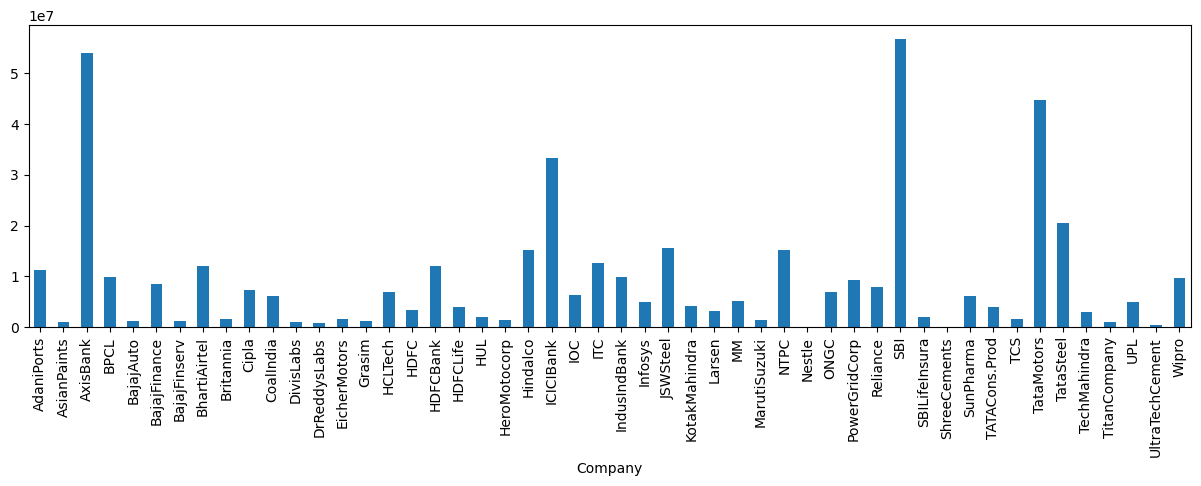

In [39]:
plt.figure(dpi = 100, figsize=(15,4))
df.groupby(['Company'])['Volume'].min().plot(kind = 'bar');

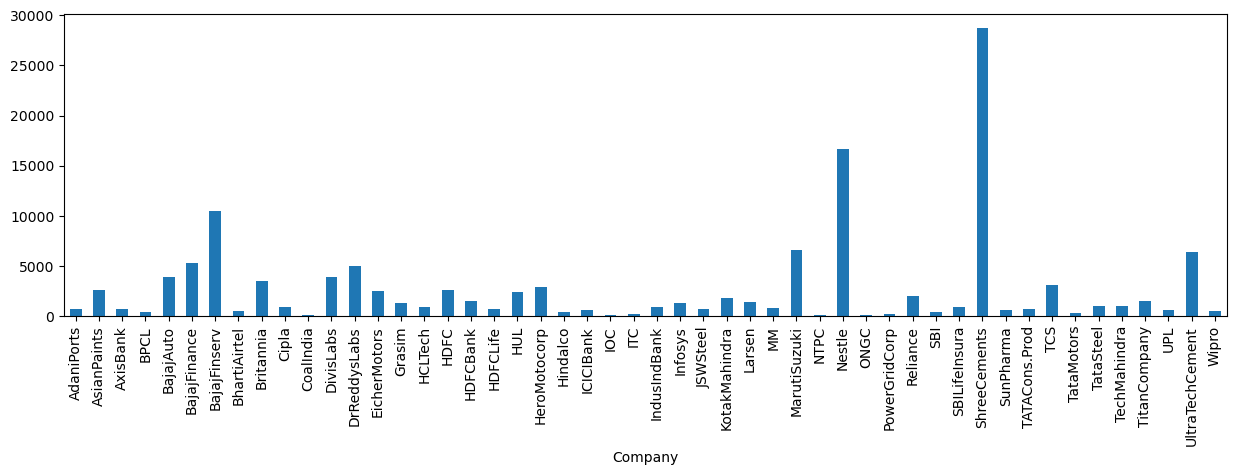

In [47]:
plt.figure(dpi = 100, figsize=(15,4))
df.groupby(['Company'])['LTP'].min().plot(kind = 'bar');

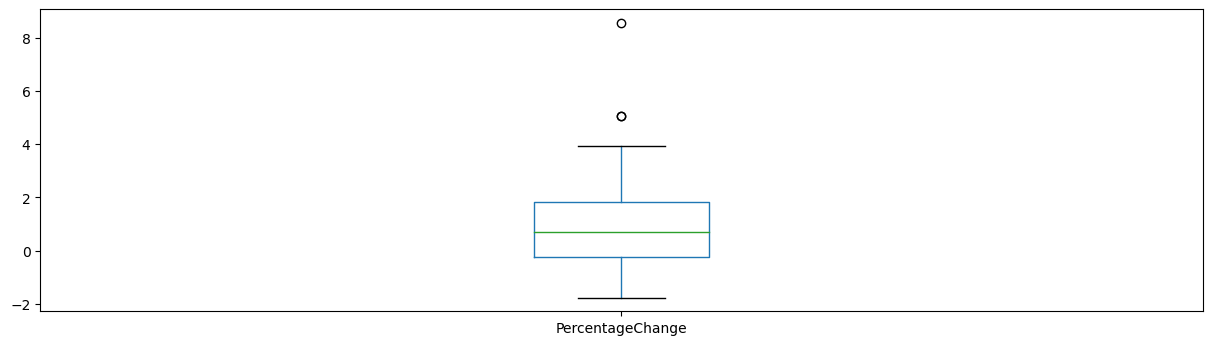

In [51]:
plt.figure(dpi = 100, figsize=(15,4))
df.groupby(['Company'])['PercentageChange'].min().plot(kind = 'box');